<a href="https://colab.research.google.com/github/YanGermanoSantos/Yan_Data_Science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Toronto, e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img alt="Toronto - Canadá" width="20%" src="https://img.freepik.com/vetores-gratis/horizonte-vermelho-de-toronto_23-2147765688.jpg?w=826&t=st=1691075207~exp=1691075807~hmac=89fc201cceec0e22581e9d8b14ce2a15ae1effb66d7658436f4560b7c976c7a6"></center>

## Obtenção dos Dados

Todos os dados obtidos para a realziação dessa analise são disponibilizado pela propria empresa a partir do site - [Inside Aribnb](http://insideairbnb.com/get-the-data/)

Para a análise exploratoria inicial será utilizado apenas o seguinte arquivo:

*   `listings.csv` - *Summary information and metrics for listings in Antwerp (good for visualisations).*

In [163]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [164]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2023-06-05/visualisations/listings.csv", sep=',')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número de id gerado para identificar imóvel
* `name` - Nome do anuncio no site
* `host_id` - Número de id gerado para identificar o anfitrião
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Coluna sem valor válido
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Tipo de quarto que é oferecido
* `price` - Preço para alugar o imóvel
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Número de reviews que a propriedade possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [165]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,643389,Rental unit in Toronto · ★4.0 · Studio · 1 bed...,3217095,Mark,NaN,South Parkdale,43.63589,-79.42796,Entire home/apt,65,28,3,2017-05-20,0.04,1,0,0,NaN
1,643916,Guest suite in Toronto · ★4.75 · 1 bedroom · 1...,574360,Yvonne,NaN,Junction Area,43.66308,-79.47795,Entire home/apt,120,28,5,2016-04-27,0.05,1,333,0,NaN
2,1194984,Home in Toronto · ★4.27 · 1 bedroom · 1 bed · ...,6530148,Lin,NaN,Roncesvalles,43.64400,-79.44270,Private room,65,28,24,2017-08-26,0.20,1,88,0,NaN
3,1419,Home in Toronto · ★5.0 · 5 bedrooms · 7 beds ·...,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,469,28,7,2017-12-04,0.07,1,0,0,NaN
4,654048,Home in Toronto · ★4.94 · 4 bedrooms · 5 beds ...,3289972,Minoo,NaN,Morningside,43.78370,-79.20675,Entire home/apt,190,28,17,2023-05-01,0.13,1,300,2,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O `dataset` escolhido para a análise é uma versão resumida do airbnb

In [32]:
# identificar o volume de dados do DataFrame
print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}".format(df.shape[1]))

# verificando os tipos da variaveis
df.dtypes

Entradas: 22356
Variáveis: 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É possivel validar que temos algumas colunas com valores faltantes dentro do `dataset` sendo elas:

*   `neighbourhood_group` com 100% dos seus valores vazio.
*   `license` com 74% dos seus valores estão faltantes isso correponde a mais da metade do nosso `dataset`
*   e podemos validar que `reviews_per_month` e `last_review` na casa dos 40% valores vazios




In [41]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.742798
reviews_per_month                 0.399132
last_review                       0.399132
host_name                         0.000089
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Olhando para esses histrogramas já podemos validar que temos algumas colunas com possíveis **outliers**


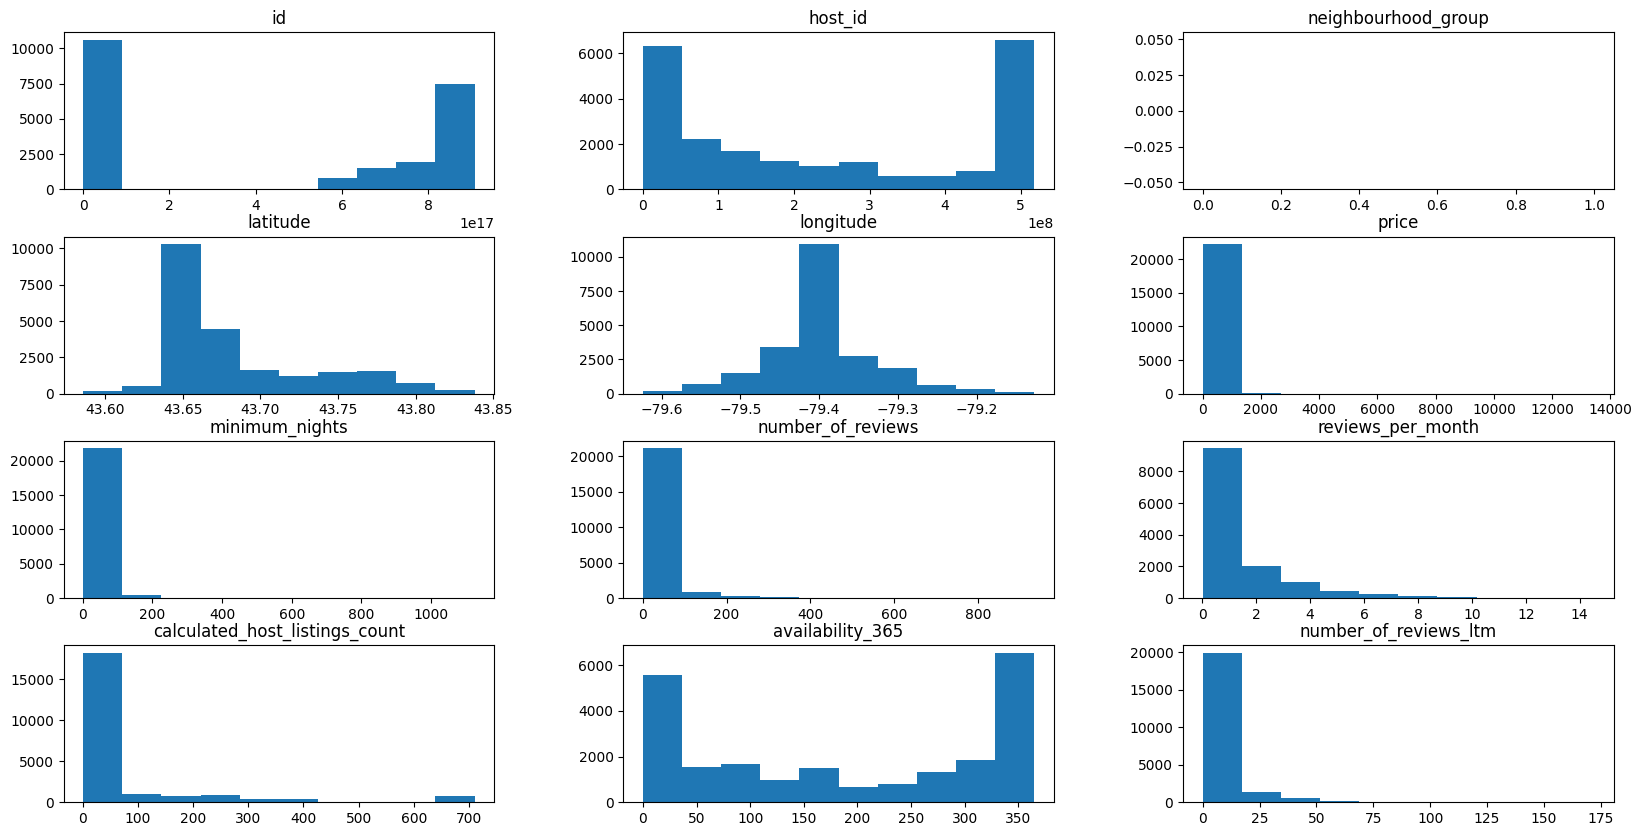

In [277]:
# plotar o histograma das variáveis numéricas
df.hist(figsize = (20, 10), grid = False);

### **Q4. Há *outliers* presentes?**

Como dito anteriormente é possivel ver que dentro do dataset possui algumas colunas com outliers sendo elas - `price`, `minimum_nights`, `calculated_host_listings_count` entre outras. Para confirmar a existência de outliers, vamos verificar usando algumas tecnicas de estatísticas sendo elas:

*   Resumo estatístico por meio do método `describe()`
*   Plotar boxplots para a variável.

In [212]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,22356.000000,22356.000000,22356.000000,13433.000000,22356.00000,22356.000000
mean,186.907497,27.596126,19.920379,1.325951,59.21104,187.045536
std,308.132850,36.433752,48.806702,1.740205,143.74793,142.081667
min,0.000000,1.000000,0.000000,0.010000,1.00000,0.000000
25%,87.000000,28.000000,0.000000,0.190000,1.00000,38.000000
50%,127.000000,28.000000,2.000000,0.610000,2.00000,180.000000
75%,200.000000,30.000000,16.000000,1.820000,17.00000,338.000000
max,13437.000000,1125.000000,935.000000,14.530000,710.00000,365.000000


Olhando as informações acima utilizando é possivel confirmar que realmente temos alguns outliers presentes no `dataset` como:



*   Variável `price` possui **75%** dos valores abaixo de 200, sendo que o valor maximo é 13.437
*   A variável `minimum_nights`	está bem estranha, podemos notar que **75%** do valores estão alocado em 30 dias e seu valor máximo de 1.125, considerando que o ano tem 365 dias, podemos notar que é estranho uma locação ter tantos dias para o minimo de noites!




#### Limpando Outliers
Vamos entender essa variável por meio de um *boxplot*, pois conseguimos entender visualmente como os **valores estão distribuidos**.


---


Para entender esses valores precisamos identificar seus limites superiores e inferiores e para isso vamos utiliza o método **IQR Score** que é construido da seguinte forma:

*   Para o limite mínimo: Q1 - 1.5 * IQR
*   Para o limite máximo: Q3 + 1.5 * IQR


##### **Outliers price**
Vamos verificar os outliers de price

In [228]:
# Identificando os outliers de price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR de price: ', IQR_price)

# Definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print("Limite superior: ", sup_price)
print("Limite inferior: ", inf_price)

IQR de price:  113.0
Limite superior:  369.5
Limite inferior:  -82.5


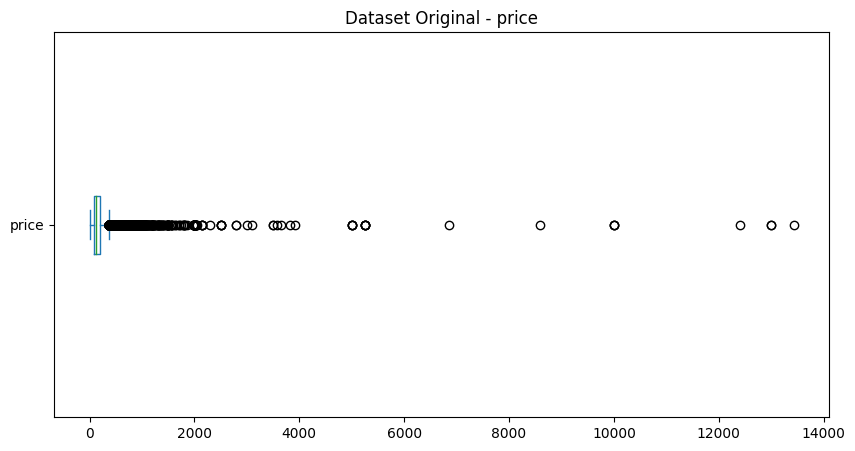

O data set possui 22356 colunas
2061 Entradas acima de 369.5
Representam 9.22% do dataset


In [264]:
# Verificando o conjunto original com boxplot
df.price.plot(kind = 'box', figsize = (10,5), vert = False, title = 'Dataset Original - price')
plt.show()

print('O data set possui {} colunas'.format(df.shape[0]))
print('{} Entradas acima de 369.5'.format(len(df[df['price'] > 369.5])))
print('Representam {:.2f}% do dataset'.format((len(df[df.price > 369.5]) / df.shape[0])*100))

Com essas informações podemos entender que **9.22%** do nosso `dataset` possui valores acima de 369.5

##### **Outliers minimum_nights**
Para a coluna `minimum_nights` vamos utilizar um método diferente, pois estamos considerando que a alta quantidade de minimo de noites para se hospedar no local é para pessoas que vão ficar mais de 3 meses hospedadas, poderiamos levantar um hipótese de que são pessoas que estão de intercâmbio.


---

Nesse passo vamos apenas verificar a quantidade de minimo de noites que ocupa uma porcentagem menor que 1% dos nosso `dataset`, com essa informação vai ser possivel desconsiderar os Outliers.

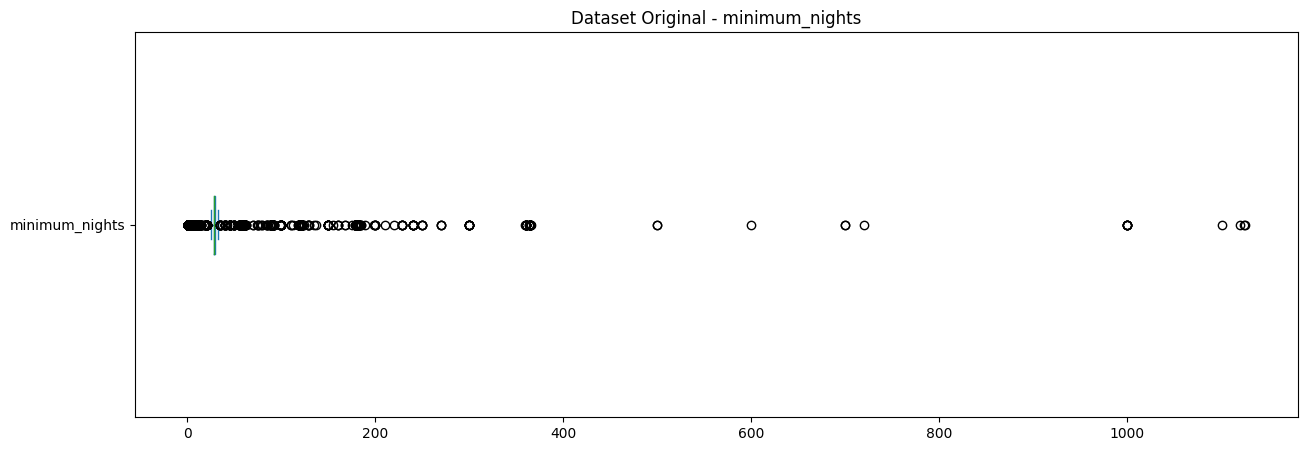

minimum_nights: valores acima de 175:
239 entradas
1.0691%


In [315]:
# Identificando boxplot de minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 5), title = 'Dataset Original - minimum_nights')
plt.show()

# ver quantidade de valores acima de 175 dias para minimum_nights
print("minimum_nights: valores acima de 175:")
print("{} entradas".format(len(df[df.minimum_nights > 175])))
print("{:.4f}%".format((len(df[df.minimum_nights > 175]) / df.shape[0])*100))

##### Realizando limpeza

In [310]:
# Realizando a limpeza de outliers
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 369.5].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 175].index, axis = 0, inplace = True)


print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ', df_clean.shape)

Shape antes da limpeza:  (22356, 18)
Shape após a limpeza:  (20069, 18)


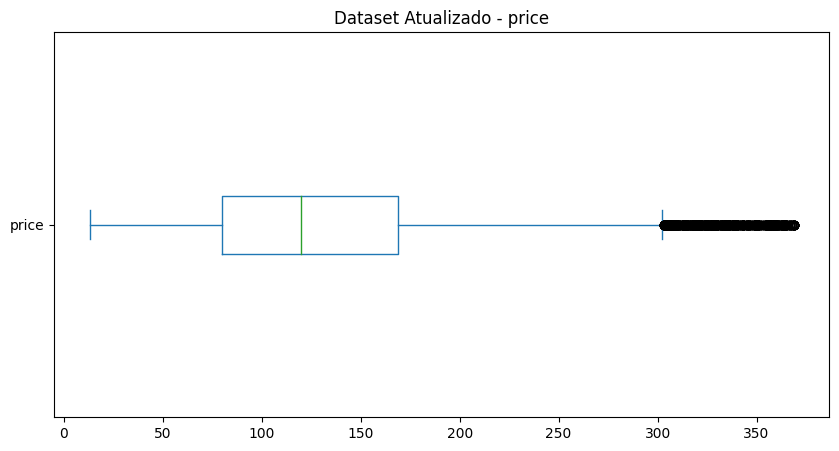

Shape antes da limpeza:  (22356, 18)
Shape após a limpeza:  (20189, 18)


In [303]:
# Verificando o conjunto de price atualizado com boxplot
df_clean.price.plot(kind = 'box', figsize = (10,5), vert = False, title = 'Dataset Atualizado - price')
plt.show()

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ', df_clean.shape)

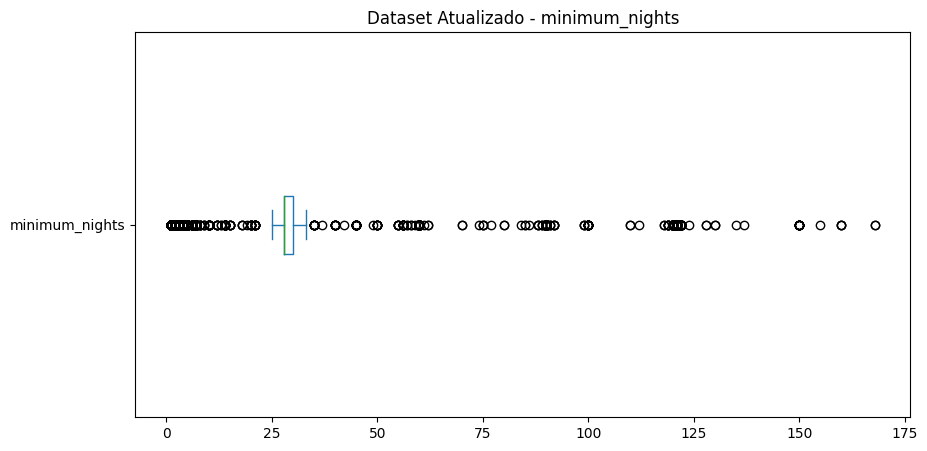

Shape antes da limpeza:  (22356, 18)
Shape após a limpeza:  (20068, 18)


In [308]:
# Verificando o conjunto de minimum_nights atualizado com boxplot
df_clean.minimum_nights.plot(kind = 'box', figsize = (10,5), vert = False, title = 'Dataset Atualizado - minimum_nights')
plt.show()

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ', df_clean.shape)

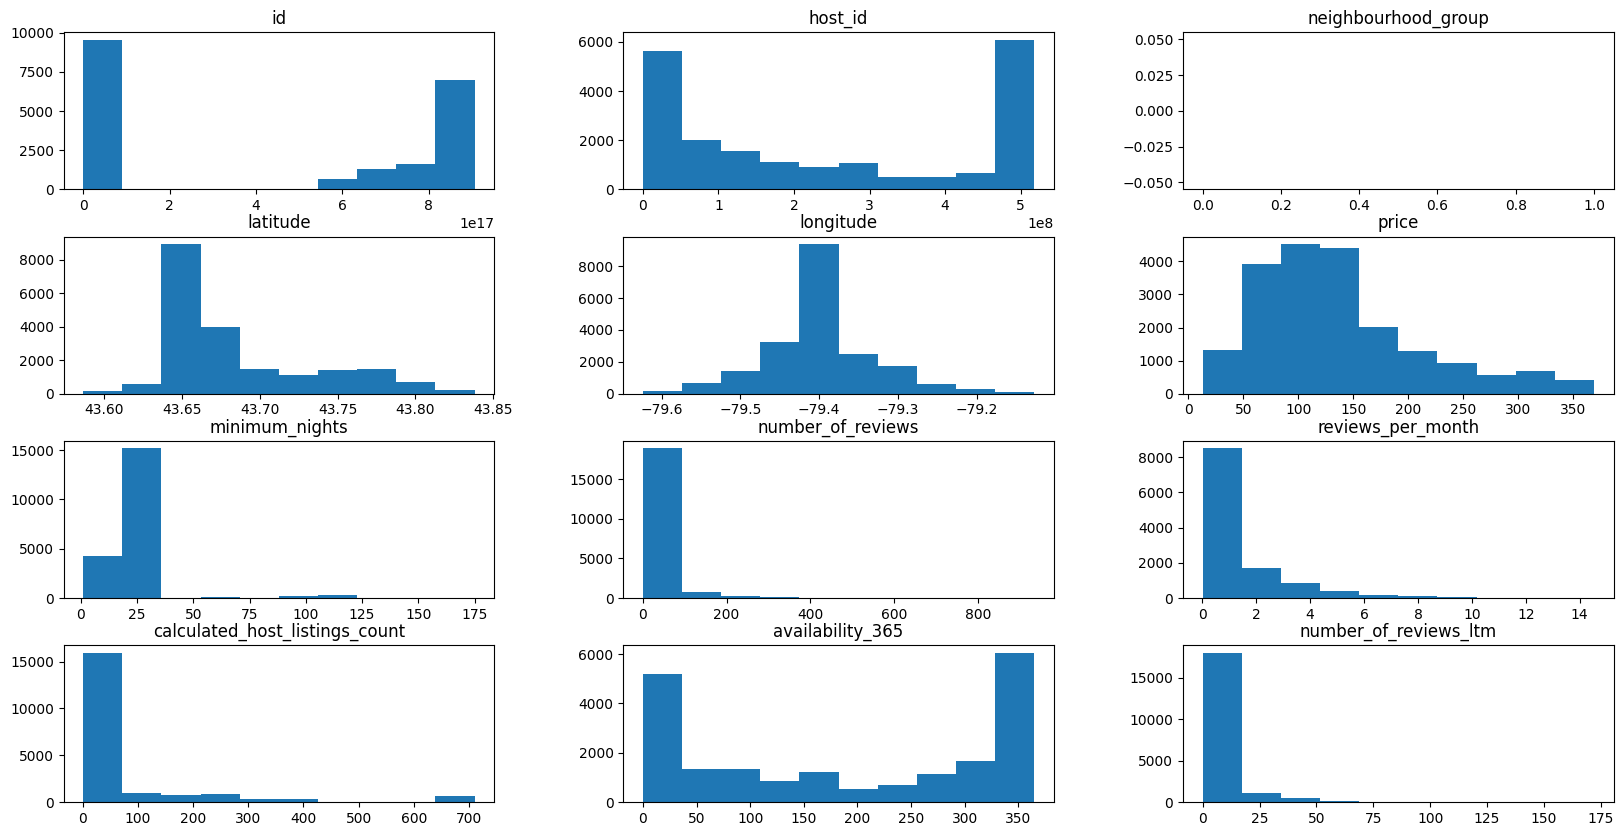

In [311]:
# Plotando um histograma com os dados atualizado
df_clean.hist(figsize = (20, 10), grid = False);

Podemos validar que agora a coluna price está bem distribuida, olhando para o boxplot podemos averiguar que não exsitem mais tantos outliers presentes. Agora olhando para o histograma é possivel validar que está bem mais distribuido com o que estava anteriormente.

Agora com esses dados limpos, podemos prosseguir com algumas outras analises.

### **Q5. Qual a média dos preços de aluguel?**
Considerando o fato que no Canadá se utiliza como moeda o *dólar canadense*, então podemos dizer que com a **média do aluguel sendo 187** dólares canadenses é possivel considerar um bom preço para o povo canadense, pois estamos falando que o aluguel tem uma participação de 3,97% em cima do salario minimo que é em média $ 3.437

In [321]:
# ver a média da coluna `price``
df_clean.price.mean()

136.3542777417908

In [322]:
# Porcentagem da média em comparação com o salario minimo do Canadá
SalarioM = 3437
print('{} %'.format(round(df_clean.price.mean() / SalarioM * 100, 2)))

3.97 %


### **Q6. Qual a correlação existente entre as variáveis**

A correlação nos permite entender que pos duas variáveis em conjunto, qual a relação entre elas, dentro do nosso contexto estamos querendo saber se existe ou não relação entre as variáveis.

É possivel validar que não temos nenhuma correlação de grande importância em nosso `dataset`.

In [323]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr();
# mostrar a matriz de correlação
display(corr);

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.164411,0.038123,0.239928,-0.007698,0.018933
minimum_nights,-0.164411,1.000000,-0.186574,-0.466052,0.180642,0.204430
number_of_reviews,0.038123,-0.186574,1.000000,0.444544,-0.167618,-0.154186
reviews_per_month,0.239928,-0.466052,0.444544,1.000000,-0.087420,0.049897
calculated_host_listings_count,-0.007698,0.180642,-0.167618,-0.087420,1.000000,0.427958
availability_365,0.018933,0.204430,-0.154186,0.049897,0.427958,1.000000


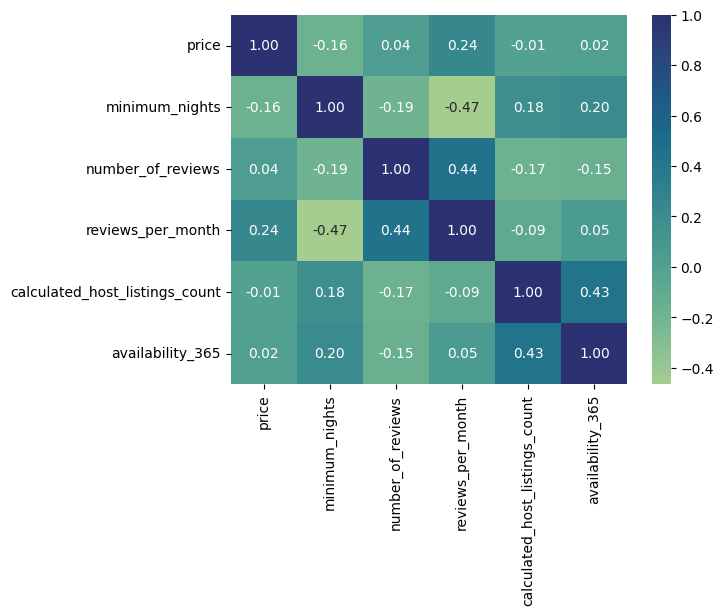

In [324]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, annot = True, cmap = "crest", fmt = '0.2f');

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna room_type é a coluna responsavel por guardar os valores de qual o tipo da locação. Para quem não conhece o aplicativo eles possuem diversos tipos de locações como quartos compartilhados, apartamentos, casas...

In [325]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    13048
Private room        6884
Shared room          135
Hotel room             2
Name: room_type, dtype: int64

In [326]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.583646
Private room       0.307926
Shared room        0.006039
Hotel room         0.000089
Name: room_type, dtype: float64

Olhando os resultados acima, podemos entender que grande parte das locações são:


*   `Entire home/apt` com **58%** de participação
*   Em segundo lugar com **30%** temos o `Private room`
*   O restante possui uma participação muito baixa **menor que 1%** que são os tipo `Shared room` e `Hotel room`




### **Q8. Qual a localidade mais cara do dataset?**



In [330]:
# ver preços por bairros, na média
df_clean.groupby('neighbourhood',).price.mean().sort_values(ascending = False)[:20]

neighbourhood
Waterfront Communities-The Island      199.952544
Niagara                                180.539735
Beechborough-Greenbrook                171.578947
Bay Street Corridor                    170.926686
Moss Park                              160.634328
Annex                                  160.612033
Rosedale-Moore Park                    159.072727
Mount Pleasant West                    157.480447
Runnymede-Bloor West Village           155.166667
Woodbine-Lumsden                       154.714286
Greenwood-Coxwell                      154.241379
Mimico (includes Humber Bay Shores)    154.183099
Lambton Baby Point                     154.076923
Yonge-Eglinton                         153.356164
Casa Loma                              151.283333
Bridle Path-Sunnybrook-York Mills      147.818182
Church-Yonge Corridor                  147.656109
Leaside-Bennington                     147.377778
Cabbagetown-South St.James Town        145.779221
Regent Park                         

<Axes: xlabel='longitude', ylabel='latitude'>

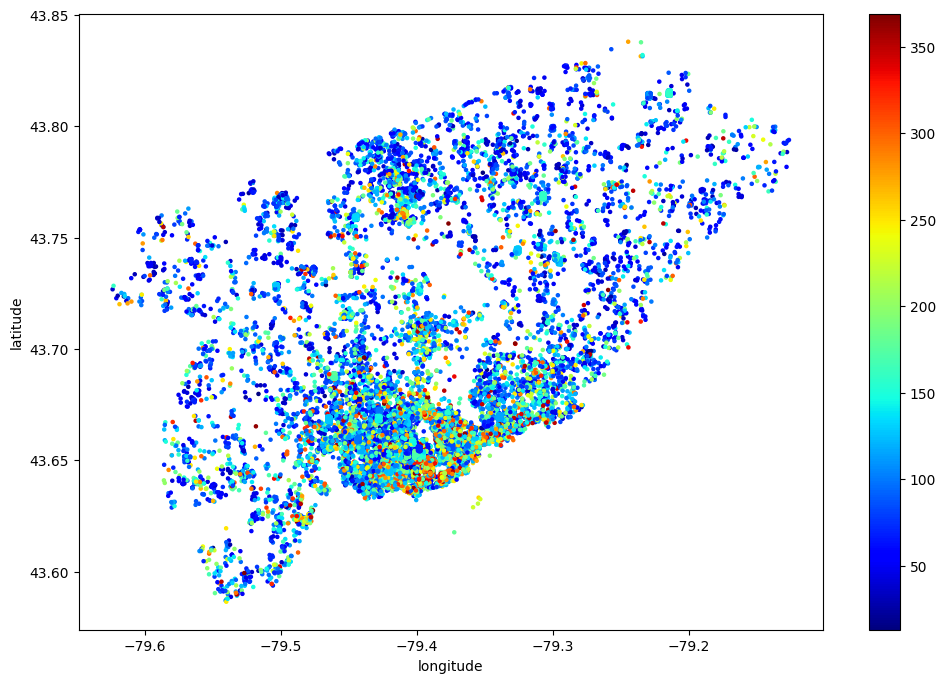

In [328]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', c= df_clean['price'], cmap=plt.get_cmap('jet'),
        figsize=(12,8), s = 5)

É possivel validar que localidade mais cara é a de *Waterfront Communities-The Island*, e é possível analisar atravez do mapa que grande parte do nosso `dataset` está preenchido de locações com valores igual ou menor que 180.

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [333]:
# ver a média da coluna `minimum_nights`
df_clean.minimum_nights.mean()

25.948228611291047

Temos um média bem alta! Podemos levantar um hipótese de que essa quantidade é alta pois estamos falando do Canadá uma cidade muito procurada para intercâmbio e até mesmo turistas, considerando que Toronto é uma cidade muito famosa.

## **Conclusões**


Foi feita uma análise superficial na base em que utilizamos do Airbnb, porém já foi possivel identificar alguns pontos como outliers em algumas variáveis.

Também foi possivel notar que a cidade de toronto possui uma grande média de minimo de noites para locação, e isso nos faz levantar a hipótese de que a alta quantidade de minimo de noites se da porque Toronto é uma cidade muito frequentada por turistas e intercâmbistas.

Olhando para os preços podemos validar que para quem é cidadão canadense alugar um imóvel é algo tranquilo! Já que a média de valores é equivalente a 3,97% do salário mínimo.
